Kelayakan kredit: 79.58


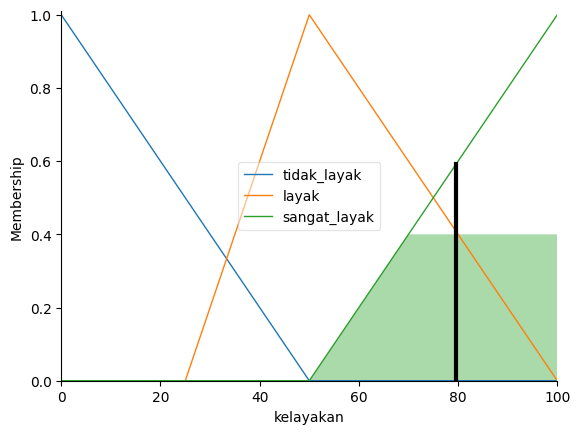

In [ ]:
# implementasi fuzzy untuk sistem penilaian kredit (Metode Mamdani)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Define fuzzy variables
pendapatan = ctrl.Antecedent(np.arange(0, 10001, 1), 'pendapatan')
utang = ctrl.Antecedent(np.arange(0, 10001, 1), 'utang')
riwayat_kredit = ctrl.Antecedent(np.arange(0, 11, 1), 'riwayat_kredit')
kelayakan = ctrl.Consequent(np.arange(0, 101, 1), 'kelayakan')

# 2. Define membership functions
pendapatan['rendah'] = fuzz.trimf(pendapatan.universe, [0, 0, 5000])
pendapatan['sedang'] = fuzz.trimf(pendapatan.universe, [2000, 5000, 8000])
pendapatan['tinggi'] = fuzz.trimf(pendapatan.universe, [5000, 10000, 10000])

utang['rendah'] = fuzz.trimf(utang.universe, [0, 0, 5000])
utang['sedang'] = fuzz.trimf(utang.universe, [2000, 5000, 8000])
utang['tinggi'] = fuzz.trimf(utang.universe, [5000, 10000, 10000])

riwayat_kredit['buruk'] = fuzz.trimf(riwayat_kredit.universe, [0, 0, 5])
riwayat_kredit['sedang'] = fuzz.trimf(riwayat_kredit.universe, [3, 5, 8])
riwayat_kredit['baik'] = fuzz.trimf(riwayat_kredit.universe, [5, 10, 10])

kelayakan['tidak_layak'] = fuzz.trimf(kelayakan.universe, [0, 0, 50])
kelayakan['layak'] = fuzz.trimf(kelayakan.universe, [25, 50, 100])
kelayakan['sangat_layak'] = fuzz.trimf(kelayakan.universe, [50, 100, 100])

# 3. Define rules
rule1 = ctrl.Rule(pendapatan['rendah'] & utang['tinggi'] & riwayat_kredit['buruk'], kelayakan['tidak_layak'])
rule2 = ctrl.Rule(pendapatan['sedang'] & utang['rendah'] & riwayat_kredit['baik'], kelayakan['sangat_layak'])
rule3 = ctrl.Rule(pendapatan['tinggi'] & utang['rendah'], kelayakan['sangat_layak'])
rule4 = ctrl.Rule(utang['tinggi'], kelayakan['tidak_layak'])
rule5 = ctrl.Rule(riwayat_kredit['baik'] & utang['sedang'], kelayakan['layak'])

# 4. Create control system
kelayakan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
kelayakan_sim = ctrl.ControlSystemSimulation(kelayakan_ctrl)

# 5. Input values
kelayakan_sim.input['pendapatan'] = 7000
kelayakan_sim.input['utang'] = 2000
kelayakan_sim.input['riwayat_kredit'] = 7

# 6. Compute output
kelayakan_sim.compute()

# Output
print(f"Kelayakan kredit: {kelayakan_sim.output['kelayakan']:.2f}")

# Visualize result
import matplotlib.pyplot as plt
kelayakan.view(sim=kelayakan_sim)
plt.show()
